---

# Generic Conditional Laws for Random-Fields - via:

## Universal $\mathcal{P}_1(\mathbb{R})$-Deep Neural Model (Type A)

---

By: [Anastasis Kratsios](https://people.math.ethz.ch/~kratsioa/) - 2021.

---

# Training Algorithm:
---
## 1) Generate Data:
Generates the empirical measure $\sum_{n=1}^N \delta_{X_T(\omega_n)}$ of $X_T$ conditional on $X_0=x_0\in \mathbb{R}$ *($x_0$ and $T>0$ are user-provided)*.

## 2) Get "Sample Barycenters":
Let $\{\mu_n\}_{n=1}^N\subset\mathcal{P}_1(\mathbb{R}^d)$.  Then, the *sample barycenter* is defined by:
1. $\mathcal{M}^{(0)}\triangleq \left\{\hat{\mu}_n\right\}_{n=1}^N$,
2. For $1\leq n\leq \mbox{N sample barycenters}$: 
    - $
\mu^{\star}\in \underset{\tilde{\mu}\in \mathcal{M}^{(n)}}{\operatorname{argmin}}\, \sum_{n=1}^N \mathcal{W}_1\left(\mu^{\star},\mu_n\right),
$
    - $\mathcal{M}^{(n)}\triangleq \mathcal{M}^{(n-1)} - \{\mu^{\star}\},$
*i.e., the closest generated measure form the random sample to all other elements of the random sample.*

---
**Note:** *We simplify the computational burden of getting the correct classes by putting this right into this next loop.*

## 3) Train Deep Classifier:
$\hat{f}\in \operatorname{argmin}_{f \in \mathcal{NN}_{d:N}^{\star}} 
\sum_{x \in \mathbb{X}}
\, 
\mathbb{H}
\left(
    \operatorname{Softmax}_N\circ f(x)_n| I\left\{W_1(\hat{\mu}_n,\mu_x),\inf_{m\leq N} W_1(\hat{\mu}_m,\mu_x)\right\}
\right);
$
where $\mathbb{H}$ is the categorical cross-entropy.  

---
---
---
## Notes - Why the procedure is so computationally efficient?
---
 - The sample barycenters do not require us to solve for any new Wasserstein-1 Barycenters; which is much more computationally costly,
 - Our training procedure never back-propages through $\mathcal{W}_1$ since steps 2 and 3 are full-decoupled.  Therefore, training our deep classifier is (comparatively) cheap since it takes values in the standard $N$-simplex.

---

## Meta-Parameters

### Simulation

#### Ground Truth:
*The build-in Options:*
- rSDE 
- pfBM
- 2lnflow

In [16]:
# Option 1:
groud_truth = "rSDE"
# Option 2:
# groud_truth = "2lnflow"
## Option 3:
# groud_truth = "pfBM"

#### Grid Hyperparameter(s)

In [17]:
## Monte-Carlo
N_Euler_Maruyama_Steps = 10*2
N_Monte_Carlo_Samples = 10**3
N_Monte_Carlo_Samples_Test = 10**3 # How many MC-samples to draw from test-set?

# End times for Time-Grid
T_end = 1
T_end_test = 1.1


## Grid
N_Grid_Finess = 10*2
Max_Grid = 0.5
x_0 = 1

# Number of Centers (\hat{\mu}_s)
N_Quantizers_to_parameterize = 200

This option sets $\delta$ in $B_{\mathbb{R}\times [0,\infty)}(\hat{x}_n,\delta)$; where $\hat{x}_n\in \nu_{\cdot}^{-1}[\hat{\mu}]$.  N_measures_per_center sets the number of samples to draw in this ball...by construction the training set is $\delta$-bounded and $\nu_{(x,t)}$, for any such $x$ is $\omega_{\nu_{\cdot}}(\delta)$-bounded in $\mathcal{P}_1(\mathbb{R})$.

In [18]:
# Hyper-parameters of Cover
delta = 0.1
N_measures_per_center = 10**2

**Note**: Setting *N_Quantizers_to_parameterize* prevents any barycenters and sub-sampling.

#### Mode: Code-Testin Parameter(s)
- True: $\Rightarrow$ cross validation through grid of very mild parameters just to test hardward or software.
- False: $\Rightarrow$ run CV-grid.

In [19]:
trial_run = True

### Meta-parameters
Ratio $\frac{\text{Testing Datasize}}{\text{Training Datasize}}$.

In [20]:
test_size_ratio = .25

## Simulation from Rough SDE
Simulate via Euler-M method from:
$$ 
X_T^x = x + \int_0^T \alpha(s,X_s^x)ds + \int_0^T((1-\eta)\beta(s,X_s^s)+\eta\sigma_s^H)dW_s.
$$

### Drift

In [21]:
def alpha(t,x):
    return 0.1

### Volatility

In [22]:
def beta(t,x):
    return 0.01

### Roughness Meta-parameters
 - Roughness is $H$,
 - Ratio_fBM_to_typical_vol is $\eta$.

In [23]:
Rougness = 0.9 # Hurst Parameter
Ratio_fBM_to_typical_vol = 0.5 # $\eta$ in equation above.

## Simulation from Measure-Valued $2$-Parameter Log-Gaussian Flow
$$
X_{t,x} \sim \log\text{-}\mathcal{N}\left(\alpha(t,x),\beta(t,x)\right).
$$

**Note:** *$\alpha$ and $\beta$ are specified below in the SDE Example*.

  0%|          | 0/4 [00:00<?, ?it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Building Training + Testing Set - rough-SDE Ground-Truth


100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Training Classifer Portion of Type-A Model
Fitting 2 folds for each of 1 candidates, totalling 2 fits



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    3.7s finished


Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3913 - accuracy: 0.2500
Epoch 2/200
2/2 [==============================] - 0s 1ms/step - loss: 1.3555 - accuracy: 0.4667
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3277 - accuracy: 0.5167
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 1.2972 - accuracy: 0.5333
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 1.2660 - accuracy: 0.5667
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 1.2297 - accuracy: 0.5500
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1859 - accuracy: 0.5500
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1384 - accuracy: 0.5500
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.5667
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0355 - accuracy: 0.6000
Epoch 11/200
2/2 [===========

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 86/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 87/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 88/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 89/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 90/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 91/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 92/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 93/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 94/200
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 3.4055e-04 - accuracy: 1.0000
Epoch 165/200
2/2 [==============================] - 0s 4ms/step - loss: 3.3577e-04 - accuracy: 1.0000
Epoch 166/200
2/2 [==============================] - 0s 2ms/step - loss: 3.3077e-04 - accuracy: 1.0000
Epoch 167/200
2/2 [==============================] - 0s 3ms/step - loss: 3.2625e-04 - accuracy: 1.0000
Epoch 168/200
2/2 [==============================] - 0s 3ms/step - loss: 3.2187e-04 - accuracy: 1.0000
Epoch 169/200
2/2 [==============================] - 0s 3ms/step - loss: 3.1691e-04 - accuracy: 1.0000
Epoch 170/200
2/2 [==============================] - 0s 2ms/step - loss: 3.1290e-04 - accuracy: 1.0000
Epoch 171/200
2/2 [==============================] - 0s 2ms/step - loss: 3.0844e-04 - accuracy: 1.0000
Epoch 172/200
2/2 [==============================] - 0s 3ms/step - loss: 3.0390e-04 - accuracy: 1.0000
Epoch 173/200
2/2 [==============================] - 0s 2ms/step - loss: 2.9994e-04 - a

  0%|          | 0/4 [00:00<?, ?it/s]

Training Classifer Portion of Type-A Model: Done!
#---------------------------------------#
Building Training Set (Regression): START
#---------------------------------------#


  0%|          | 0/4 [00:00<?, ?it/s]

#-------------------------------------#
Building Training Set (Regression): END
#-------------------------------------#
#-------------------------------------#
Building Test Set (Predictions): START
#-------------------------------------#


100%|██████████| 4/4 [00:00<00:00, 2405.34it/s]

#-----------------------------------#
Building Test Set (Predictions): END
#-----------------------------------#
#-----------------------------#
Building Barycenters Set: START
#-----------------------------#
#-----------------------------#
Building Barycenters Set: END
#-----------------------------#



  0%|          | 0/59 [00:00<?, ?it/s]

Building Training Set Performance Metrics


100%|██████████| 20/20 [00:00<00:00, 630.78it/s]

Building Test Set Performance Metrics


#----------------------#
Training-Set Performance
#----------------------#
           W1    E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min  0.000027  7.978087e-07         2.824409e-09                0.053842   
MAE  0.700694  7.307743e-03         8.627181e-03                0.494948   
Max  8.297696  2.303895e-02         4.209142e-02                0.825698   

     (E[X'^4]-E[X^4])^.25  
Min              0.107511  
MAE              0.665627  
Max              1.078798  
 
 
 
#------------------#
Test-Set Performance
#------------------#
           W1    E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min  0.000027  7.967313e-07         2.824296e-09                0.053842   
MAE  0.083872  2.605946e-03         3.386600e-04                0.267858   
Max  0.244582  9.043381e-03         1.688447e-03                0.459625   

     (E[X'^4]-E[X^4])^.25  
Min              0.107511  
MAE              0.408791  
Max              0.687579  
 
 
 


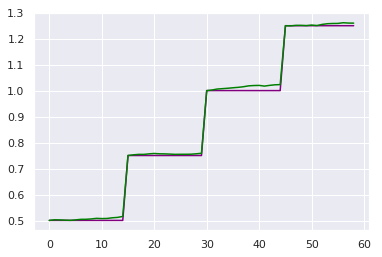

In [25]:
# Run Backend
# %run Universal_Processes_Trainer_BACKEND.ipynb
exec(open('Universal_Processes_Trainer_BACKEND.py').read())

# Visualization
*From hereon out...do nothing and just let the backend sript run...the images and tables will load :).*

Example Noises
Example Paths
Visualization of Training-Set Performance


No handles with labels found to put in legend.


Visualizing Training Predictions vs. Ground-Truth (Training Set)
Visualization of Test-Set Performance


No handles with labels found to put in legend.


Visualizing Training Predictions vs. Ground-Truth (Testing Set)
Visualizing Predictions Erros (Training Set)
Visualizing Predictions Erros (Test Set)


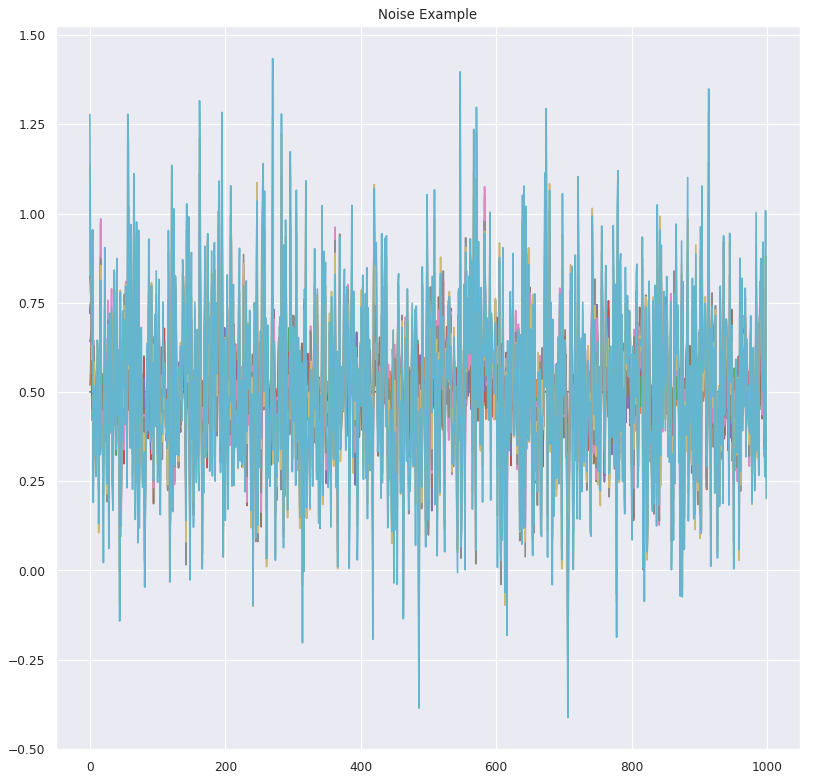

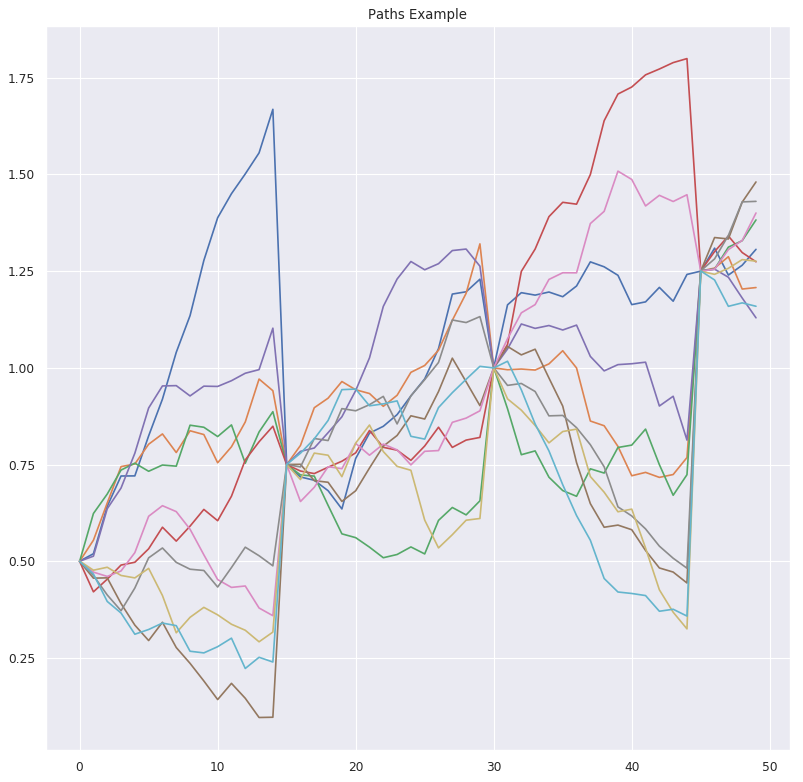

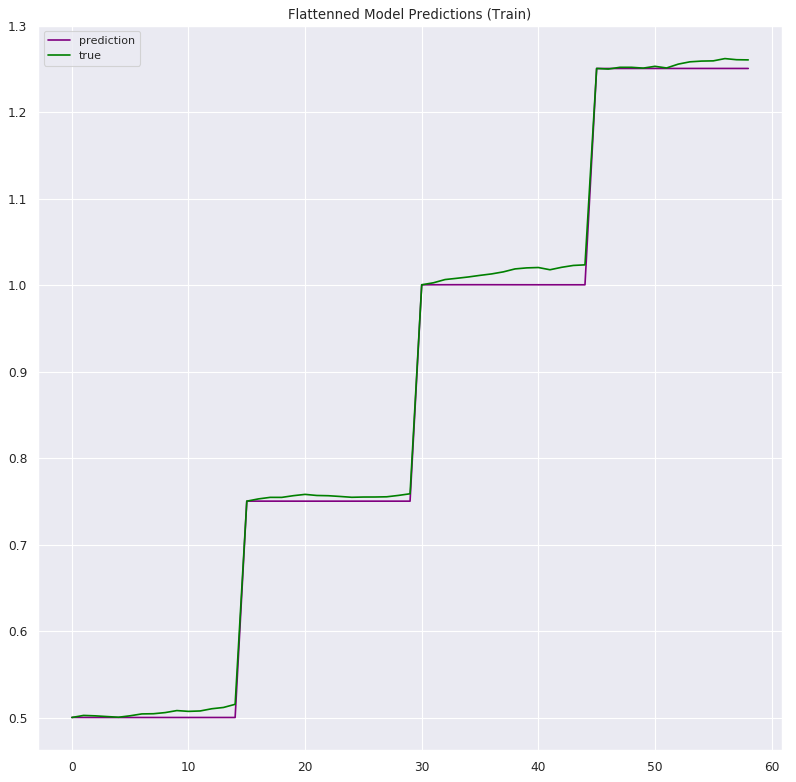

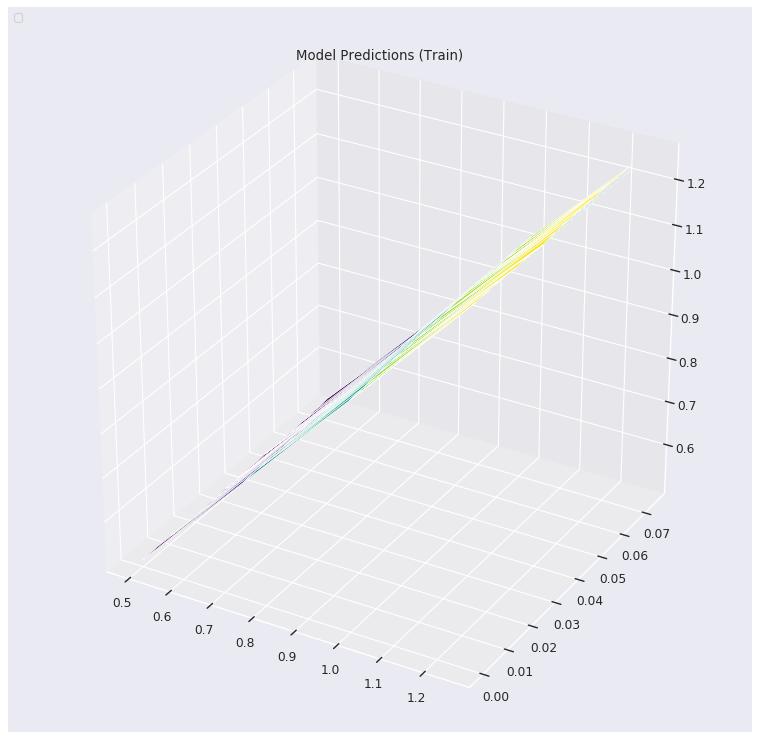

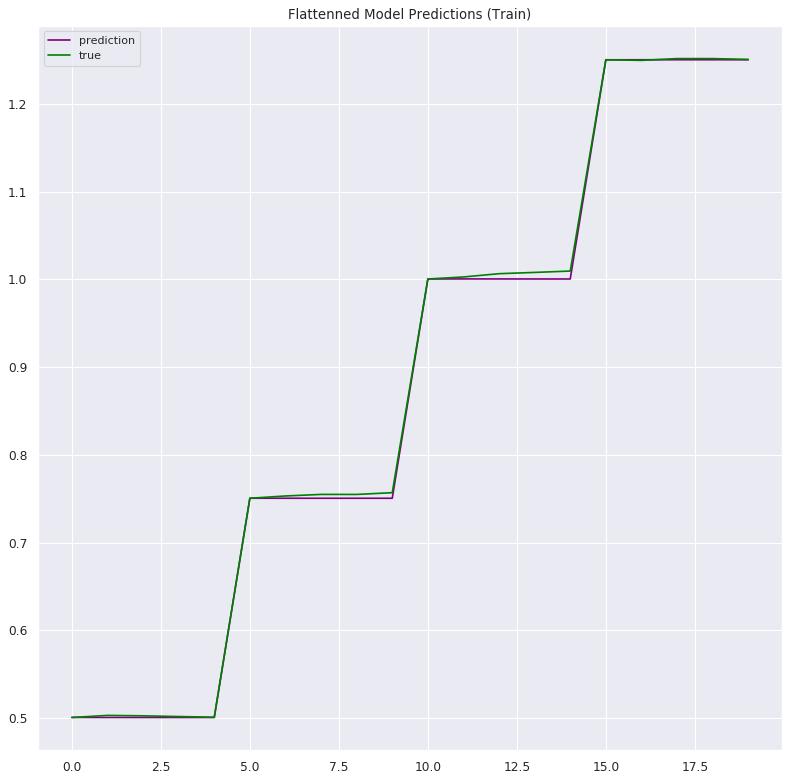

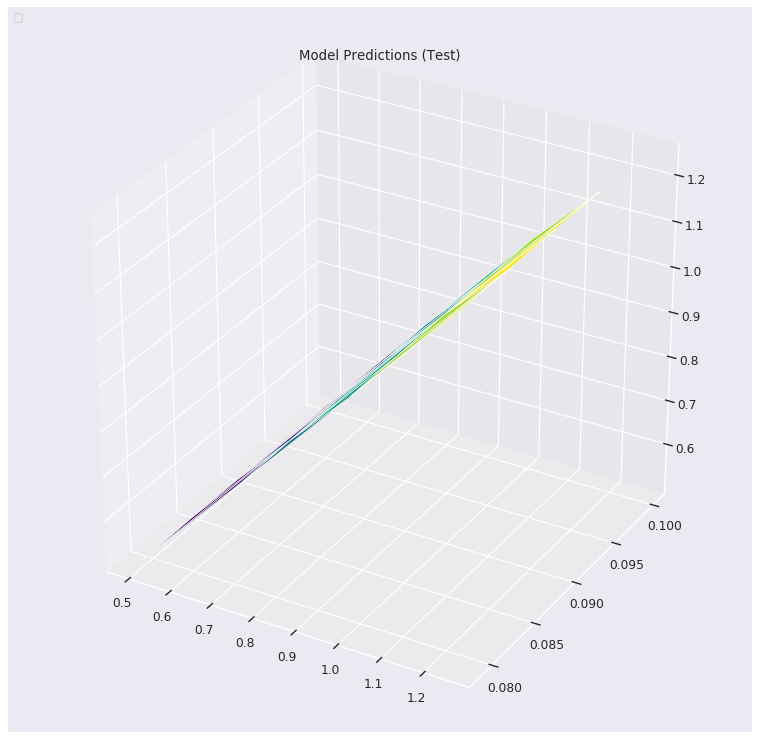

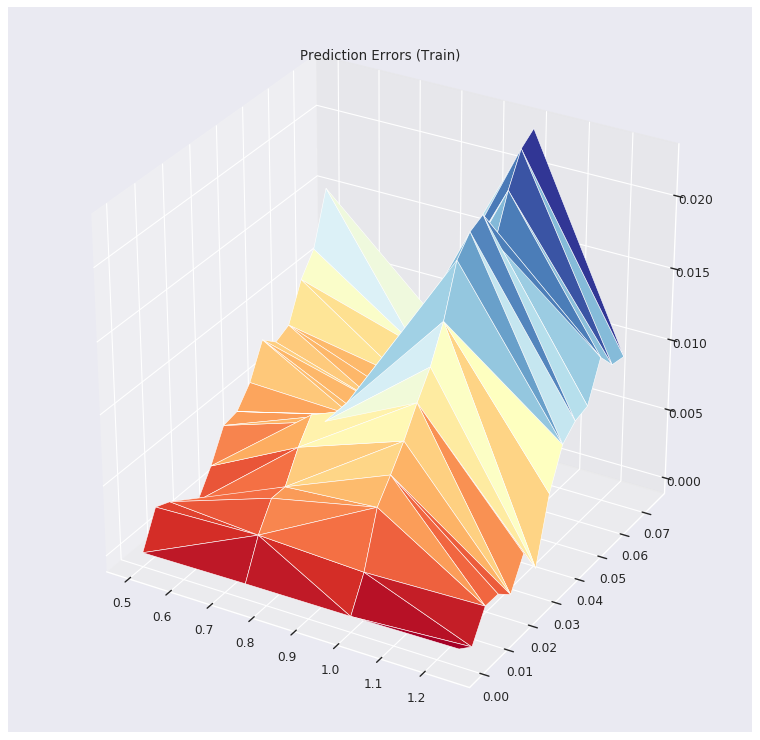

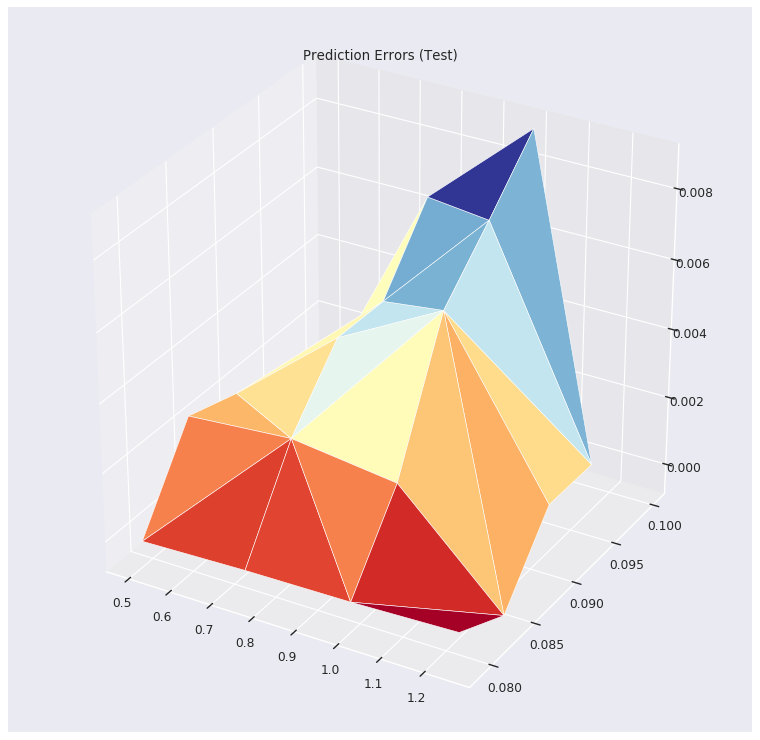

In [26]:
# Run Backend
# %run Universal_Processes_Trainer_Visuals.ipynb
exec(open('Universal_Processes_Trainer_Visuals.py').read())

## Update User
We empirically estimate the standard error and confidence intervals or the relevant error distributions using the method of this paper: [Bootstrap Methods for Standard Errors, Confidence Intervals, and Other Measures of Statistical Accuracy - by: B. Efron and R. Tibshirani ](https://www.jstor.org/stable/2245500?casa_token=w_8ZaRuo1qwAAAAA%3Ax5kzbYXzxGSWj-EZaC10XyOVADJyKQGXOVA9huJejP9Tt7fgMNhmPhj-C3WdgbB9AEZdqjT5q_azPmBLH6pDq61jzVFxV4XxqBuerQRBLaaOFKcyr0s&seq=1#metadata_info_tab_contents)

### Training-Set Performance

In [27]:
Type_A_Prediction

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,0.000027,7.978087e-07,2.824409e-09,0.053842,0.107511
MAE,0.700694,7.307743e-03,8.627181e-03,0.494948,0.665627
Max,8.297696,2.303895e-02,4.209142e-02,0.825698,1.078798


#### Predictions

In [28]:
Type_A_Predictions_and_confidence.T

,CL,Mean,CU
W1_99_Train,-0.597541,-0.155818,0.192068
W1error_99_Train,-0.722298,-0.155818,0.266617
M_95_Train,0.805594,0.869151,0.945411
M_99_Train,0.780178,0.869151,0.975078
MC_95_Train,0.804615,0.876431,0.944935
MC_99_Train,0.787404,0.876431,0.973864


### Test-Set Performance

In [29]:
Type_A_Prediction_test

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,0.000027,7.967313e-07,2.824296e-09,0.053842,0.107511
MAE,0.083872,2.605946e-03,3.386600e-04,0.267858,0.408791
Max,0.244582,9.043381e-03,1.688447e-03,0.459625,0.687579


#### Predictions

In [30]:
Type_A_Predictions_and_confidence_test.T

,CL,Mean,CU
W1_99_Test,0.054139,0.083872,0.113828
W1error_99_Test,0.046848,0.083872,0.127187
M_95_Test,0.763003,0.875505,1.000503
M_99_Test,0.738007,0.875505,1.038003
MC_95_Test,0.765146,0.878025,1.003445
MC_99_Test,0.727525,0.878025,1.027918


### Model Complexity

In [31]:
Model_Complexity

,N_Params,Training Time,N_Centers,N_Q,Time Test,Time EM-MC
Model_Complexity_metrics,81804,9.126276,4,1000,-0.050615,-0.000001


---

---
# Fin
---

---